# Singular WF test

In [1]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la
import torch

N = 16
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([4], dtype=int),
    trap=(50, 1000),
    lc=(100, 1600),
    band=1,
    dim=1,
    avg=1,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = dvr.eigen_basis()
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

R = dvr.Xmat(W, p)
dvr.verbosity = 3
solution = riemann_optimize(R, None, dvr.verbosity)
U = site_order(dvr, solution, R)
A = U.conj().T @ (E[:, None] * U) * dvr.V0 / dvr.kHz_2p
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


E = [-3.56093826 -2.90358269 -2.29907563 -1.74287252]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1  1  1]
 [-1  1  1]]
Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
   1         +1.3163438721269063e-01    2.92321856e-01    
   2         +5.0547531040852446e-02    1.14365672e-01    
   3         +3.8472889076835493e-02    4.49096845e-02    
   4         +3.6562112322949959e-02    2.12704632e-02    
   5         +3.5862052119617890e-02    2.08656450e-02    
   6         +3.3043100927369229e-02    3.84981640e-02    
   7         +2.9292838720559870e-02    6.21331334e-02    
   8         +1.4710436531712643e-02    1.45029622e-01    
   9         +8.6759817229060867e-03    1.11977856e-01    
  10         +1.9660426414617495e-03    4.44829157e-02    
  11         +1.0074677072294215e-04    7.48844374e-03    
  12         +5.2491503333729225e-05    5.81316878e-03    
  13         +1.7864399393314930e-05    2.975766

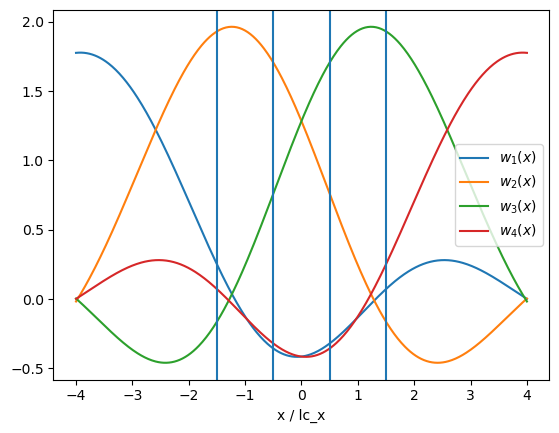

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-4 * dvr.lc[0], 4 * dvr.lc[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x / dvr.lc[0],
         fix_phase(wannier_func([x, y, z], U, dvr, W,  p)[:, 0, 0, :]),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('x / lc_x')
plt.legend()
plt.axvline(-1.5)
plt.axvline(-0.5)
plt.axvline(1.5)
plt.axvline(0.5)

### 2D square expectation value test

In [3]:
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase
import numpy.linalg as la
import torch
import itertools as it

N = 16
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N=N,
    R0=R0,
    lattice=np.array([3, 3], dtype=int),
    trap=(50, 1000),
    lc=(1000, 1000),
    band=1,
    dim=2,
    sparse=True,
    symmetry=True,
    verbosity=0)

E, W, parity = dvr.eigen_basis()
E = E[0]
W = W[0]
p = parity[0]
print(f'E = {E}')
print(f'parity = {p}')

R = dvr.Xmat(W, p)
solution = riemann_optimize(R, None)
U = site_order(dvr, solution, R)
A = U.conj().T @ (E[:, None] * U) * dvr.V0 / dvr.kHz_2p
print('detU =', la.det(U))
V = singleband_interaction(dvr, U, U, W, W, p,  p)
# for i in range(dvr.bands):
#     mu = np.diag(A[i])  # Diagonals are mu_i
#     t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
#     print(f'V_{i+1}_i = ', np.real(mu))
#     print(f't_{i+1}_ij =', abs(t))
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('V_i = ', np.real(mu))
print('t_ij =', abs(t))
print('U_i =', abs(V))


E = [-1.4911675  -1.38547389 -1.38547389 -1.28113713 -1.26954329 -1.2679606
 -1.16536608 -1.16536608 -1.11520142]
parity = [[ 1  1  1]
 [-1  1  1]
 [ 1 -1  1]
 [-1 -1  1]
 [ 1  1  1]
 [ 1  1  1]
 [ 1 -1  1]
 [-1  1  1]
 [ 1 -1  1]]
detU = 1.000000000000001
V_i =  [-62.96364891 -65.07767453 -63.779952   -66.2318599  -64.06681044
 -62.39326797 -62.96366745 -65.07767166 -63.77994092]
t_ij = [[0.         2.89320958 0.32571411 2.85191751 1.50065827 0.20598881
  1.06737773 0.68470815 0.5569464 ]
 [2.89320958 0.         3.14431712 2.63178633 2.86830485 0.7488577
  0.68471592 0.23896924 0.54336204]
 [0.32571411 3.14431712 0.         0.65096086 2.07197473 2.15659437
  0.55694644 0.54337386 0.60598551]
 [2.85191751 2.63178633 0.65096086 0.         3.59901868 0.20714891
  2.85190529 2.63178674 0.65098001]
 [1.50065827 2.86830485 2.07197473 3.59901868 0.         4.48882165
  1.50064754 2.86831394 2.07196834]
 [0.20598881 0.7488577  2.15659437 0.20714891 4.48882165 0.
  0.20597788 0.74884026 2.1565

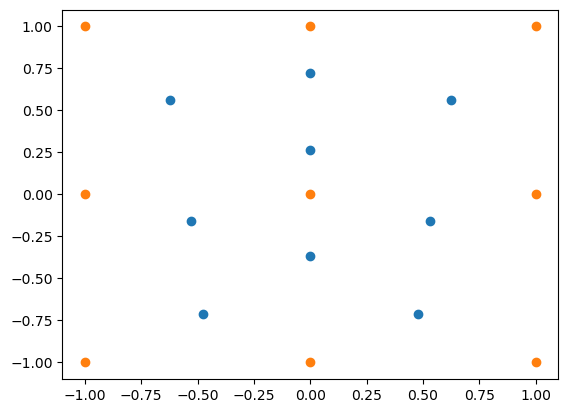

In [4]:
x = np.array([np.diag(U.T @ R[i].numpy() @ U) / dvr.lc[i]
                     for i in range(dvr.lattice_dim)]).T

plt.plot(x[:, 0], x[:, 1], 'o')
plt.plot(dvr.trap_centers[:, 0], dvr.trap_centers[:, 1], 'o')

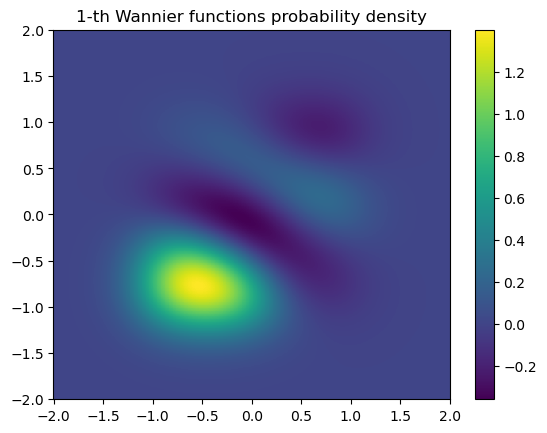

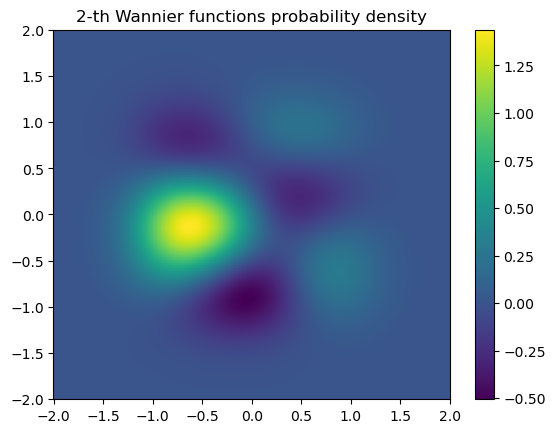

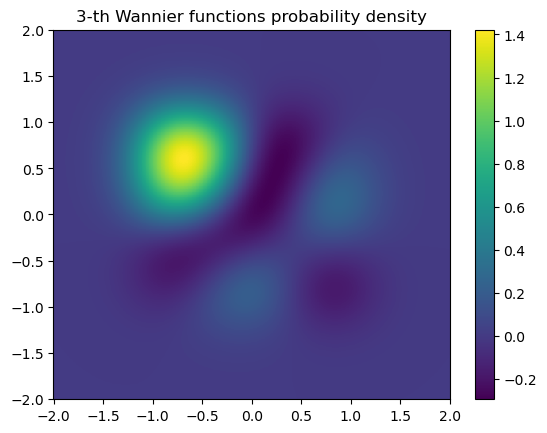

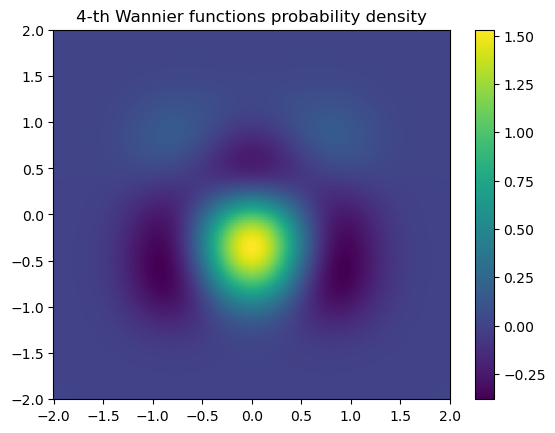

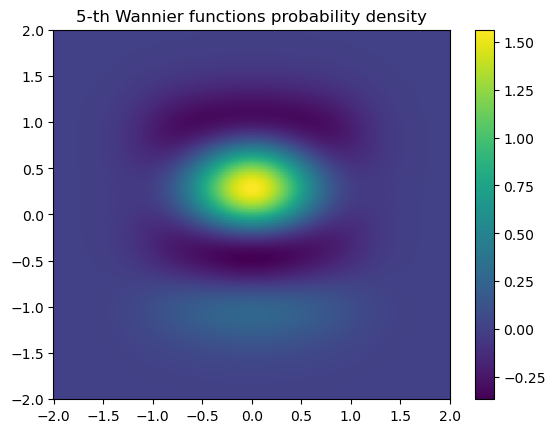

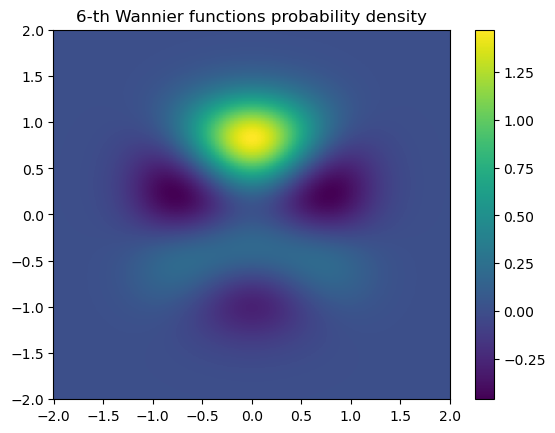

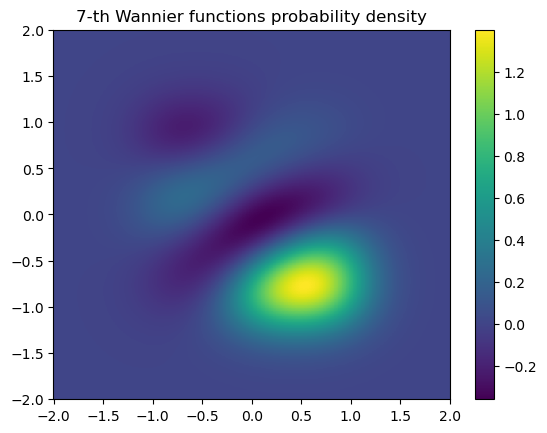

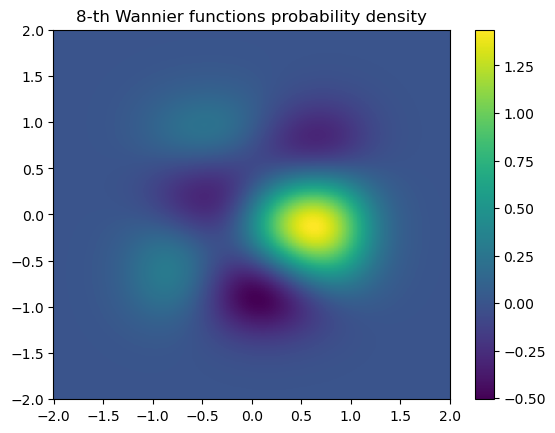

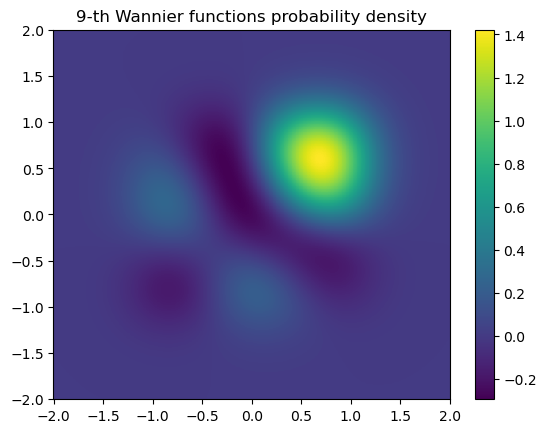

In [5]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-dvr.R0[0] / 2, dvr.R0[0] / 2, 500)
y = np.linspace(-dvr.R0[1] / 2, dvr.R0[1] / 2, 500)
z = np.array([0])
wx = wannier_func(dvr, W, U, p, (x, y, z))
X = np.meshgrid(x, y, indexing='ij')

for i in range(dvr.Nsite):
    Wx = fix_phase(wx[..., 0, i], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


The site-WF matching issue is not quite fixed, although th algorithm so far is relatively slow.